In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
np.random.seed(7)

### Let's generate 1000 samples of uniform distribution

In [2]:
y = np.random.uniform(size=1000) # Random numbers from 0, 1
y[:20]

array([0.07630829, 0.77991879, 0.43840923, 0.72346518, 0.97798951,
       0.53849587, 0.50112046, 0.07205113, 0.26843898, 0.4998825 ,
       0.67923   , 0.80373904, 0.38094113, 0.06593635, 0.2881456 ,
       0.90959353, 0.21338535, 0.45212396, 0.93120602, 0.02489923])

### Now we are to build samples of distribution with specified function
#### $y = F(x) = 1 - e^{-\frac{1}{2}x^2}, x \in [0, \infty)$
### Let's find inverse function
#### $x = \sqrt{-2\ln(1 - y)}, y \in [0, 1) $
### This will be our transform function from uniform distribution to the one we want to achieve

### Now we can easily get samples of wanted distribution. Also let's build histogram out of them

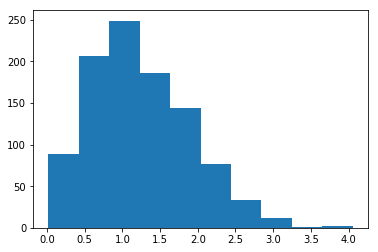

In [3]:
x = np.sqrt(-2 * np.log(1 - y))
plt.hist(x, bins=10);

### In order to check our approach, let's build plot of the original density fuction
### To find it, we will gain derivative of distribution function
#### $f(x) = x*e^{-\frac{1}{2}x^2}, x \in [0, \infty)$

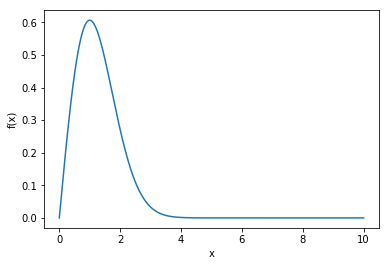

In [4]:
x_original = np.linspace(0, 10, 1000)
y_original = x_original * np.exp(-0.5 * x_original * x_original)
plt.plot(x_original, y_original)
plt.xlabel('x')
plt.ylabel('f(x)');

### Now let's calculate confidence interval for mean with unkown dispersion
### To do it, we will use the standart best measure

In [5]:
def mean_confidence_interval(data, confidence=0.95):
    n, std = len(data), np.std(data)
    margin = stats.t._ppf((1+confidence)/2, n-1) * std / np.sqrt(n)
    aver = np.average(data)
    return aver-margin, aver+margin

In [6]:
x_cut = np.random.choice(x, size=10)
mean_confidence_interval(x_cut)

(0.9385129960868569, 1.598591998733737)

### Now we will find analytic mean from specified distribution
#### $E(X) = \int_{-\infty}^{\infty} x*f(x) dx = \int_{0}^{\infty} x^2*e^{-\frac{1}{2}x^2} dx = 1.2533$
### It droped into confidence interval
### Now let's calculate rate of good predictions

In [7]:
true_mean = 1.2533

In [8]:
def good_mean_rate(data, iter_number=1000, number2choice=10, true_mean=true_mean):
    good_number = 0
    for i in range(iter_number):
        x_cut = np.random.choice(data, size=number2choice)
        low_bound, upper_bound = mean_confidence_interval(x_cut)
        if low_bound <= true_mean <= upper_bound:
            good_number += 1
    return good_number / iter_number

In [9]:
print(f'Rate of success intervals: {good_mean_rate(x)}')

Rate of success intervals: 0.933


### After that we will make a scatter plot comparing above rate for different set sizes

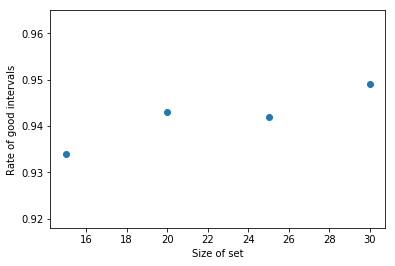

In [25]:
numbers = np.array([15, 20, 25, 30])
rates = [good_mean_rate(x, number2choice=number) for number in numbers]
plt.scatter(numbers, rates)
plt.xlabel('Size of set')
plt.ylabel('Rate of good intervals');